Importing

In [106]:
import seaborn as sns # for tie tanic dataset
import matplotlib.pyplot as plt# for data visualization
import numpy as np # spliting data
from sklearn.metrics import classification_report # for test results
from sklearn.metrics import confusion_matrix # for test results
from sklearn.preprocessing import StandardScaler # scaling dataset
from imblearn.over_sampling import RandomOverSampler # creating duplicate values

# Model
from sklearn.neighbors import KNeighborsClassifier # KNN

Loading Dataset

In [71]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Taking usefull information

In [72]:
data_frame = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "adult_male", "alive", "alone", "survived"]]
data_frame.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,survived
0,3,male,22.0,1,0,7.2500,True,no,False,0
1,1,female,38.0,1,0,71.2833,False,yes,False,1
2,3,female,26.0,0,0,7.9250,False,yes,True,1
3,1,female,35.0,1,0,53.1000,False,yes,False,1
4,3,male,35.0,0,0,8.0500,True,no,True,0


Small preprocessing

In [73]:
data_frame["sex"] = (data_frame["sex"] == "male").astype(int) # if male then 1 else 0
data_frame["adult_male"] = (data_frame["adult_male"] == True).astype(int) # if adult_male then 1 else 0
data_frame["alive"] = (data_frame["alive"] == "yes").astype(int) # if alive then 1 else 0
data_frame["alone"] = (data_frame["alone"] == True).astype(int) # if alone then 1 else 0
data_frame.dropna(inplace=True) # Droping null values
data_frame.head()

/tmp/ipython-input-1891607648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["sex"] = (data_frame["sex"] == "male").astype(int) # if male then 1 else 0
/tmp/ipython-input-1891607648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["adult_male"] = (data_frame["adult_male"] == True).astype(int) # if adult_male then 1 else 0
/tmp/ipython-input-1891607648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,survived
0,3,1,22.0,1,0,7.2500,1,0,0,0
1,1,0,38.0,1,0,71.2833,0,1,0,1
2,3,0,26.0,0,0,7.9250,0,1,1,1
3,1,0,35.0,1,0,53.1000,0,1,0,1
4,3,1,35.0,0,0,8.0500,1,0,1,0


In [74]:

display(data_frame.describe())

,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514,0.578431,0.406162,0.565826,0.406162
std,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.494156,0.491460,0.495995,0.491460
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700,1.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [75]:
display(data_frame.isnull().sum())

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
alive,0
alone,0
survived,0


In [76]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      714 non-null    int64  
 1   sex         714 non-null    int64  
 2   age         714 non-null    float64
 3   sibsp       714 non-null    int64  
 4   parch       714 non-null    int64  
 5   fare        714 non-null    float64
 6   adult_male  714 non-null    int64  
 7   alive       714 non-null    int64  
 8   alone       714 non-null    int64  
 9   survived    714 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 61.4 KB


EDA (Exploratory Data Analysis)

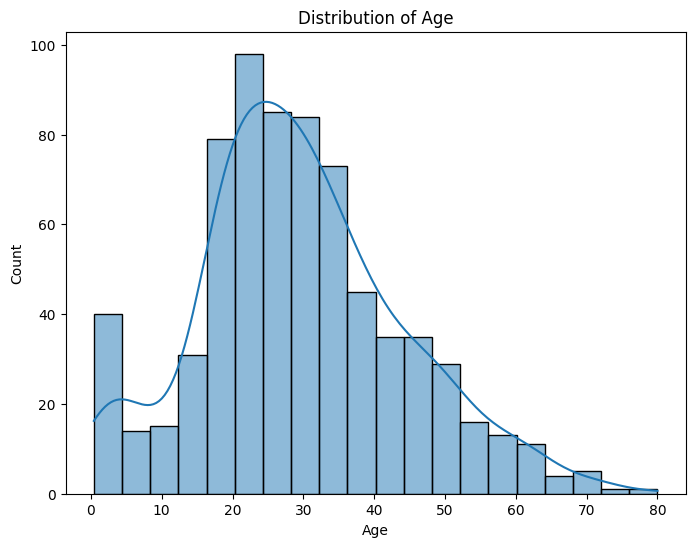

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(data_frame['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

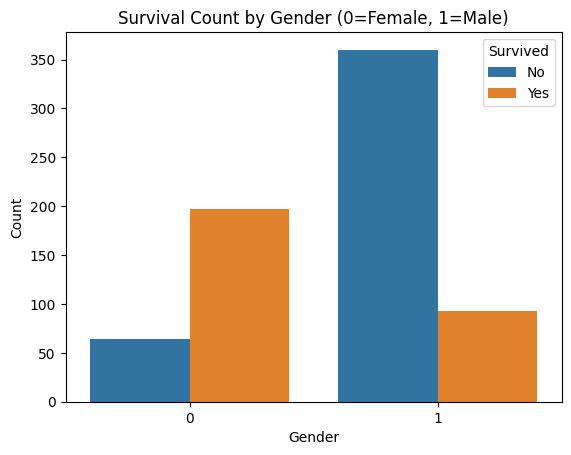

In [78]:
sns.countplot(x='sex', hue='survived', data=data_frame)
plt.title('Survival Count by Gender (0=Female, 1=Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Predictedion Labels

In [79]:
data_frame["survived"].unique()

array([0, 1])

Train, Test split

In [80]:
train, test = np.split(data_frame.sample(frac=1), [int(0.7*len(data_frame))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scaling the dataset (stardard scaling with random over sampling)

In [81]:
def scale_dataset(dataframe, over_sample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if over_sample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

Train, Test, split

In [82]:
train, X_train, y_train = scale_dataset(train, over_sample=True)
test, X_test, y_test = scale_dataset(test, over_sample=False)

Model (KNN)

In [116]:
model = KNeighborsClassifier(n_neighbors=1)

Training

In [117]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Prediction

In [118]:
prediction = model.predict(X_test)

Evaluation

In [119]:
print("Train score: ", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))
print(classification_report(y_test, prediction))

Train score:  1.0
Test score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        92

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Confusion Matrix

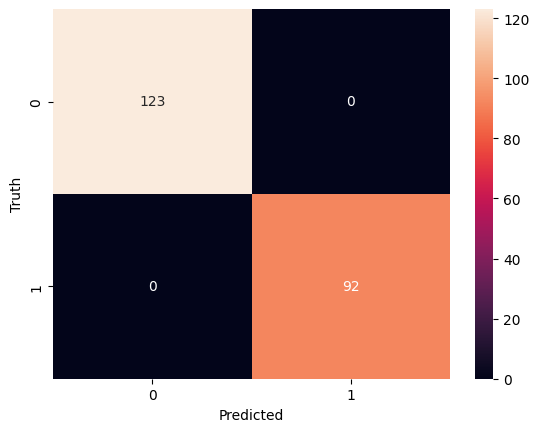

In [120]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()